In [1]:
import pandas as pd
import numpy as np


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [5]:
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/Users/taruni/Desktop/growthlink/Churn_Modelling.csv')


In [9]:
print(df.head())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [11]:
num_imputer = SimpleImputer(strategy='median')

In [12]:
cat_imputer = SimpleImputer(strategy='most_frequent')

In [13]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = num_imputer.fit_transform(df[[col]])


In [16]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = cat_imputer.fit_transform(df[[col]]).ravel()



In [18]:
### for categorcial columns
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [20]:
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


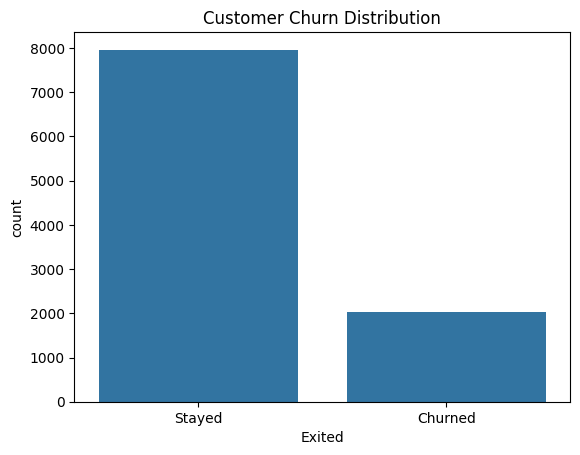

In [22]:
sns.countplot(x='Exited', data=df)
plt.xticks([0, 1], ['Stayed', 'Churned'])
plt.title('Customer Churn Distribution')
plt.show()

In [23]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [26]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [27]:
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("Random Forest:\n", classification_report(y_test, y_pred_rf))


Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.81      0.97      0.88      1607
         1.0       0.35      0.07      0.12       393

    accuracy                           0.79      2000
   macro avg       0.58      0.52      0.50      2000
weighted avg       0.72      0.79      0.73      2000

Random Forest:
               precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      1607
         1.0       0.76      0.44      0.55       393

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000



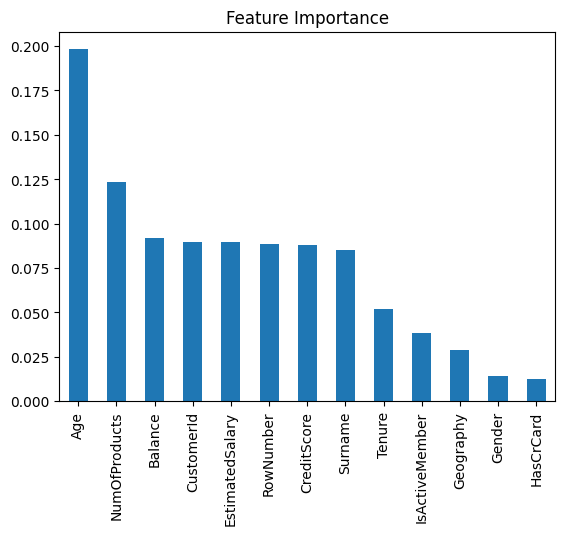

In [28]:
importances = rf.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_imp.plot(kind='bar')
plt.title('Feature Importance')
plt.show()